<a href="https://colab.research.google.com/github/sainihimanshu1999/AMA-List/blob/main/house_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install matplotlib

In [3]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
load_boston = load_boston()
x = load_boston.data
y = load_boston.target


data = pd.DataFrame(x,columns=load_boston.feature_names)
data['Sale_Price'] = y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(data.shape)

(506, 14)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  Sale_Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.isnull().sum()

CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
Sale_Price    0
dtype: int64

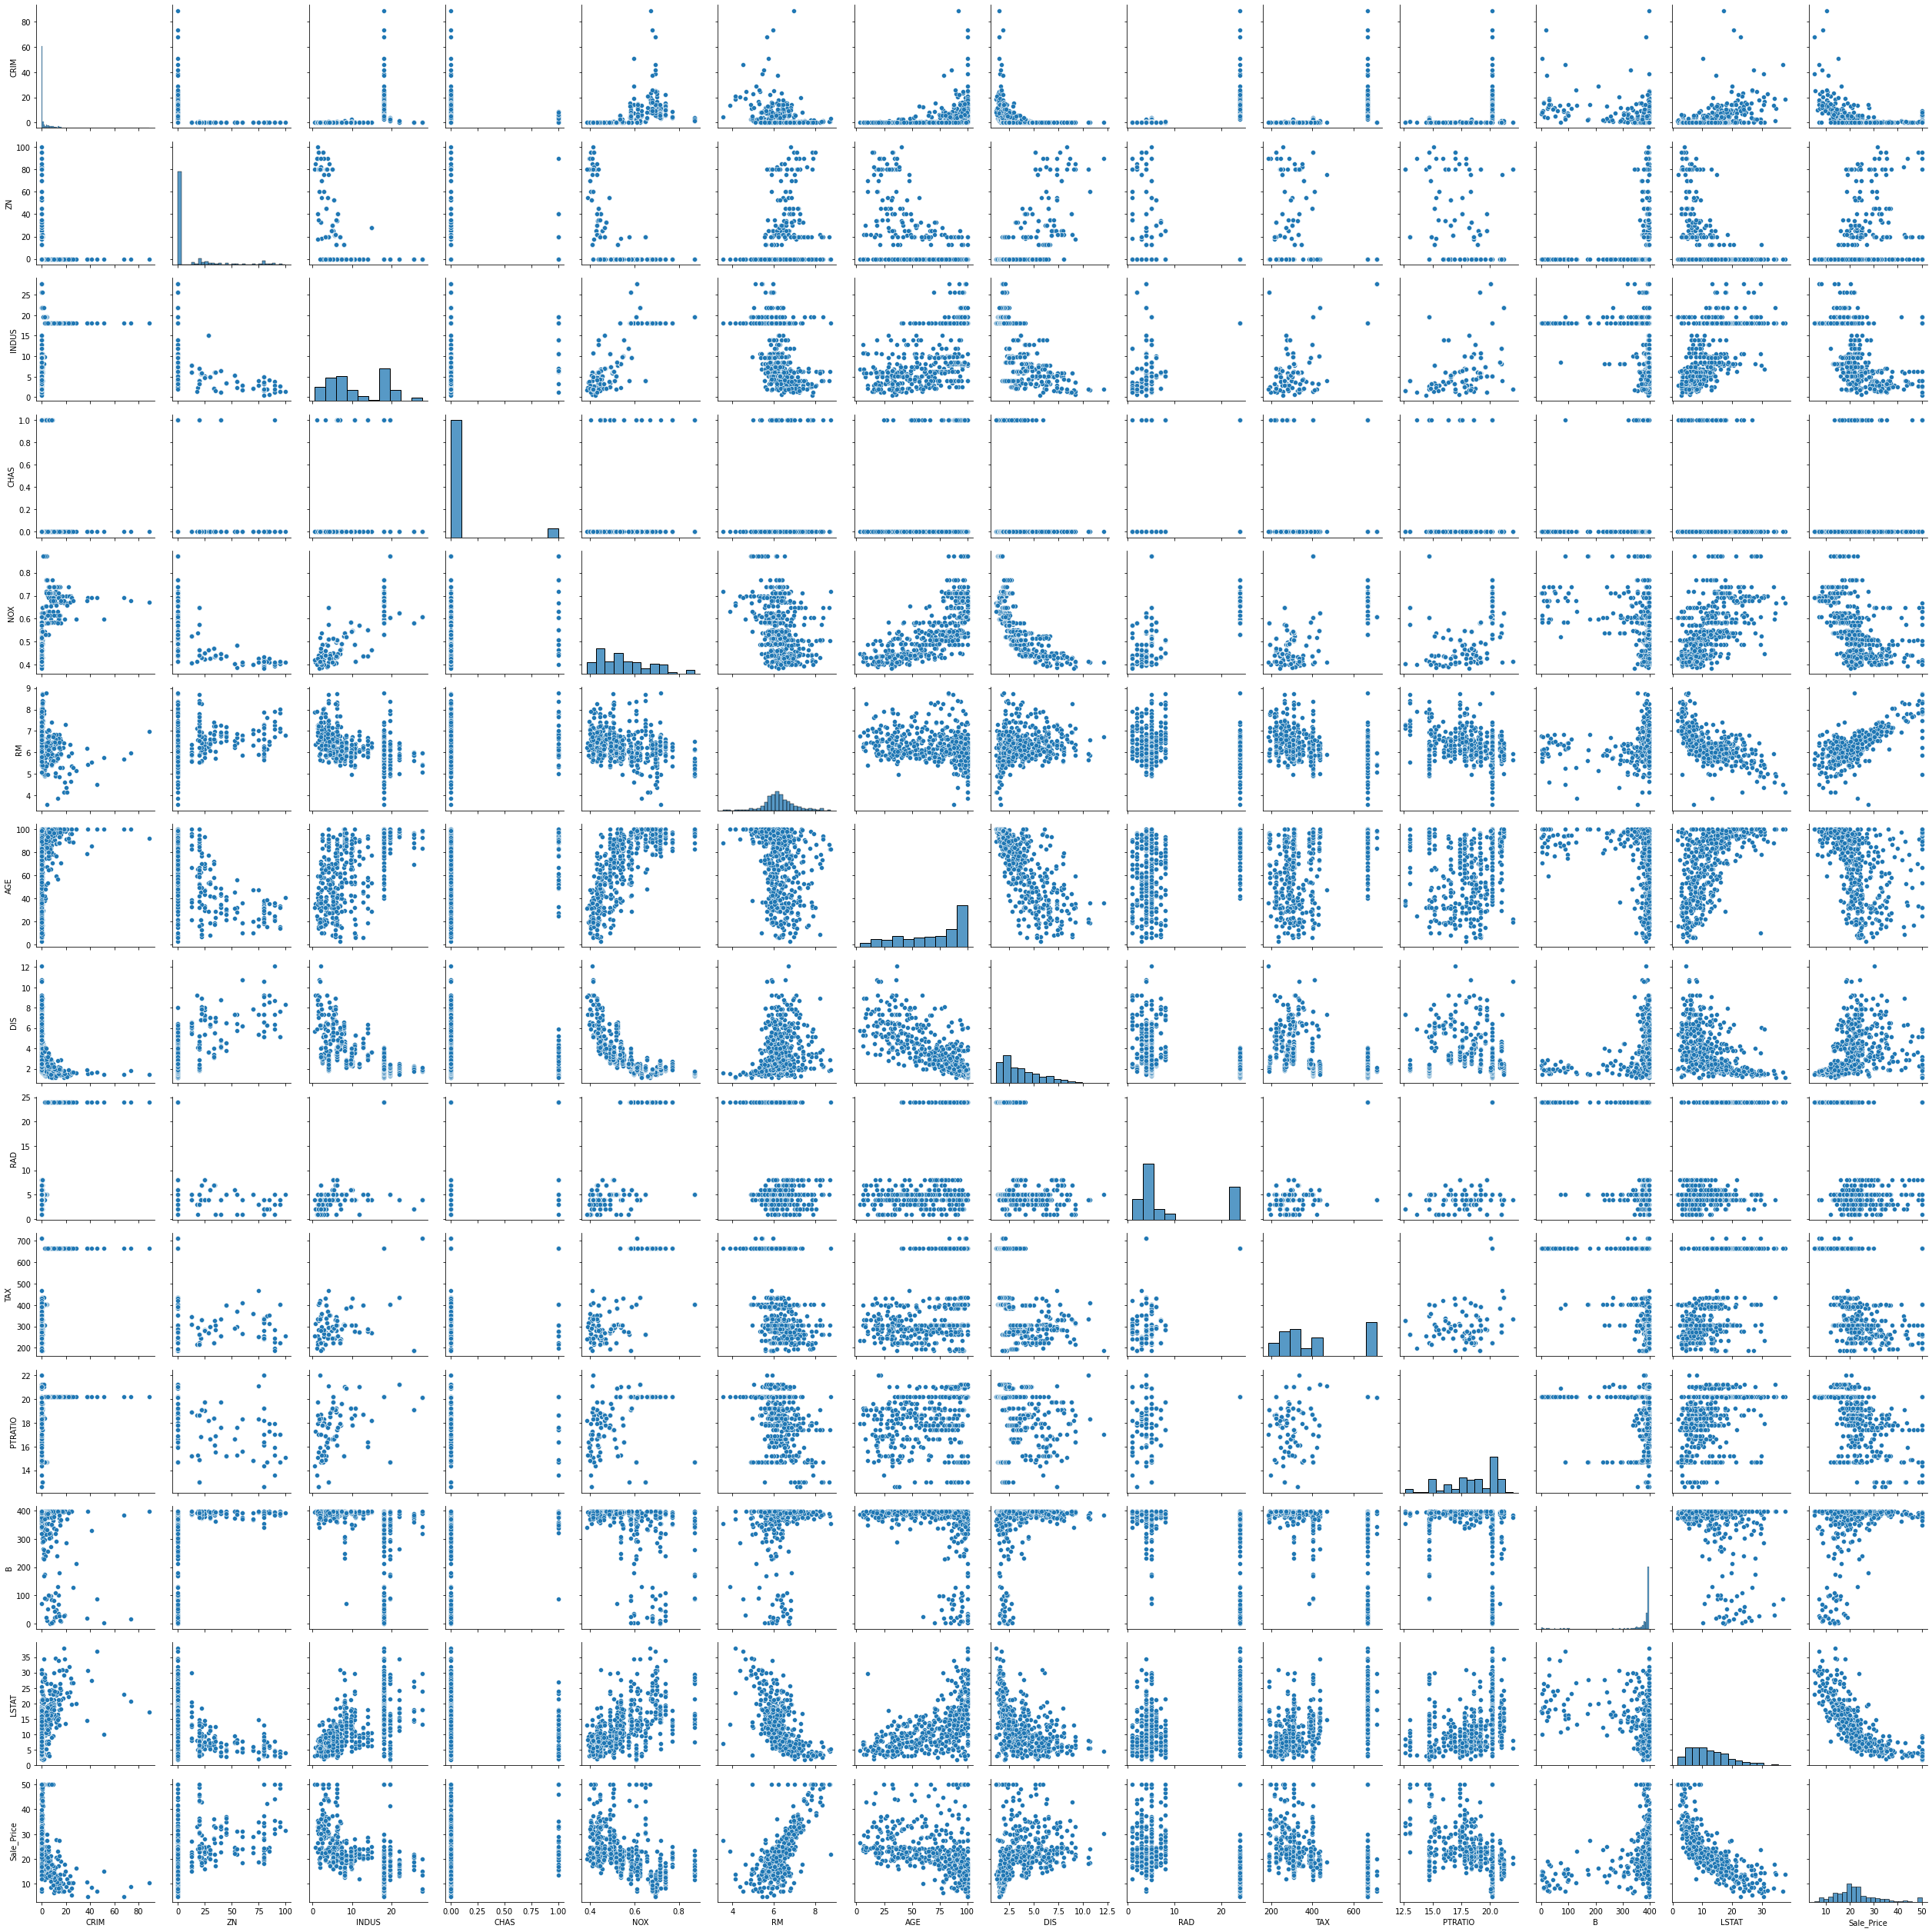

In [10]:
sns.pairplot(data, height = 2.5)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



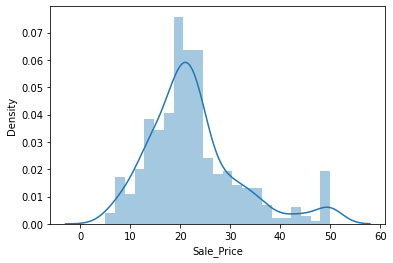

In [11]:
sns.distplot(data['Sale_Price'])

In [12]:
print('skewness %f' %data['Sale_Price'].skew())
print('kurtness %f' %data['Sale_Price'].kurt())


skewness 1.108098
kurtness 1.495197


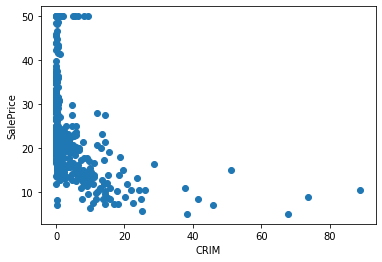

In [13]:
fig,ax = plt.subplots()
ax.scatter(x = data['CRIM'],y = data['Sale_Price'])
plt.ylabel('SalePrice')
plt.xlabel('CRIM')
plt.show()

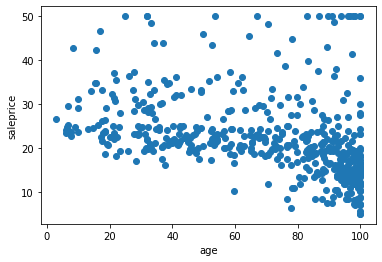

In [14]:
fig,ax = plt.subplots()
ax.scatter(x = data['AGE'],y = data['Sale_Price'])
plt.xlabel('age')
plt.ylabel('saleprice')
plt.show()

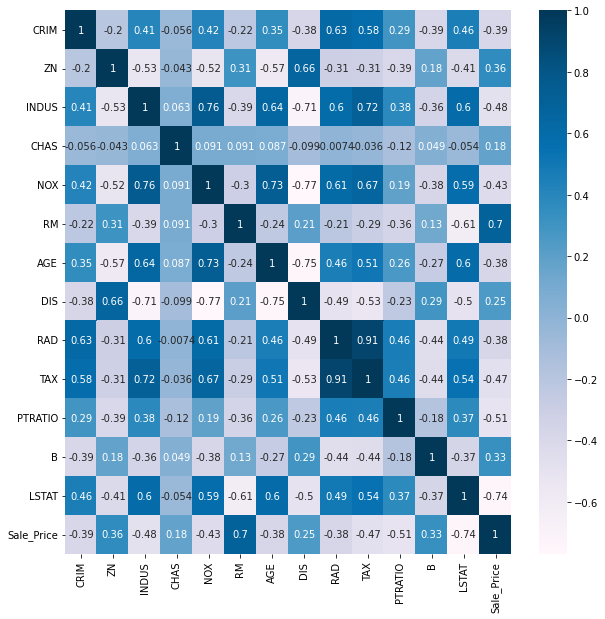

In [15]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor,annot = True,cmap =plt.cm.PuBu)
plt.show()

In [17]:
cor_target = abs(cor['Sale_Price'])
relevant_features = cor_target[cor_target>0.2]
names = [index for index,value in relevant_features.iteritems()]
names.remove('Sale_Price')
print(names)
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


In [18]:
from sklearn.model_selection import train_test_split

x = data.drop('Sale_Price',axis = 1)
y = data['Sale_Price']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [20]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

         CRIM    ZN  INDUS  CHAS     NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
477  15.02340   0.0  18.10   0.0  0.6140  ...  24.0  666.0     20.2  349.48  24.91
15    0.62739   0.0   8.14   0.0  0.5380  ...   4.0  307.0     21.0  395.62   8.47
332   0.03466  35.0   6.06   0.0  0.4379  ...   1.0  304.0     16.9  362.25   7.83
423   7.05042   0.0  18.10   0.0  0.6140  ...  24.0  666.0     20.2    2.52  23.29
19    0.72580   0.0   8.14   0.0  0.5380  ...   4.0  307.0     21.0  390.95  11.28
..        ...   ...    ...   ...     ...  ...   ...    ...      ...     ...    ...
106   0.17120   0.0   8.56   0.0  0.5200  ...   5.0  384.0     20.9  395.67  18.66
270   0.29916  20.0   6.96   0.0  0.4640  ...   3.0  223.0     18.6  388.65  13.00
348   0.01501  80.0   2.01   0.0  0.4350  ...   4.0  280.0     17.0  390.94   5.99
435  11.16040   0.0  18.10   0.0  0.7400  ...  24.0  666.0     20.2  109.85  23.27
102   0.22876   0.0   8.56   0.0  0.5200  ...   5.0  384.0     20.9   70.80  10.63

[40

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
predictions = lr.predict(x_test)

print('actual',y_test[0])
print('predict',predictions[0])

actual 24.0
predict 28.996723619824934


In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print(mse)

24.291119474973442
